In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.io import loadmat
from audio_function import plot1, plot1_f, mean_data_sep,  corr_t, corr_f, cr_arr_t, norm_max, load_mat, first_second_part, filt_freq, t_arr_for_corr_t, RMS

Данные загружены


In [2]:
data_zoom_2 = list(np.empty(13, list))
sample_rate, data_zoom_2[5] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0005/ZOOM0005_Tr2.WAV')
sample_rate, data_zoom_2[6] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0006/ZOOM0006_Tr2.WAV')
sample_rate, data_zoom_2[7] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0007/ZOOM0007_Tr2.WAV')
sample_rate, data_zoom_2[8] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0008/ZOOM0008_Tr2.WAV')
sample_rate, data_zoom_2[9] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0009/ZOOM0009_Tr2.WAV')
sample_rate, data_zoom_2[10] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0010/ZOOM0010_Tr2.WAV')
sample_rate, data_zoom_2[11] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0011/ZOOM0011_Tr2.WAV')
sample_rate, data_zoom_2[12] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0012/ZOOM0012_Tr2.WAV')
t = [0, 0, 0, 0, 0,]
f = [0, 0, 0, 0, 0,]
for i in range (6, len(data_zoom_2)+1):
    t_i = np.arange(len(data_zoom_2[i-1]))/sample_rate
    f_i = fftfreq(int(len(data_zoom_2[i-1])), 1 / sample_rate)
    t.append(t_i)
    f.append(f_i)
title = ['', '', '', '', '', 'Сигнал с вращением без излучения', 'Сигнал после поднятия кабеля, который упал', 'Сигнал с вращением', 'Сигнал ~0:30 начали вращать 2:05 закончили запись 550 Гц', 'Сигнал шумовой широкополосный источник без вращения', 'Сигнал шумовой + вращение 1:23 конец вращения; 2:57 конец вращения', 'Сигнал шум (ортоганально динамику) + 550Гц без вращения, датчик', 'Сигнал шум + 550Гц с вращением']


/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_2079/1789895417.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data_zoom_2[5] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0005/ZOOM0005_Tr2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_2079/1789895417.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data_zoom_2[6] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0006/ZOOM0006_Tr2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_2079/1789895417.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data_zoom_2[7] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0007/ZOOM0007_Tr2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_2079/1789895417.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.

In [ ]:
for i in range (5, len(data_zoom_2)):

    plt.figure(figsize=(10,4))
    plt.plot(t[i], data_zoom_2[i], color='blue')
    plt.title(title[i])
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(f[i], np.abs(ifft(data_zoom_2[i])), color='blue')
    plt.title(title[i])
    plt.xlim(0, 700)
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(t[12] , data_zoom_2[12], color='blue')
plt.xlim(348, 427)
plt.grid(True)
plt.show()

In [ ]:
t_index = (t[12] > 348) & (t[12] < 427)
t_rotation = t[12][t_index]
data_zoom_2_rotation = data_zoom_2[12][t_index]/max(data_zoom_2[12][t_index])

data_zoom_2_rotation_f = fft(data_zoom_2_rotation)
f_rotation = fftfreq(int(len(data_zoom_2_rotation)), 1 / sample_rate)
data_zoom_2_rotation_filt = ifft(filt_freq(data_zoom_2_rotation_f, 531, 533))

plt.figure(figsize=(10,4))
plt.plot(t_rotation, ((data_zoom_2_rotation_filt)), color='blue')
plt.grid(True)

In [ ]:
def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

# Пример данных: синтетический сигнал, моделирующий направленность
# num_points = 360
# example_signal = np.abs(np.cos(np.linspace(0, 2 * np.pi, num_points)))

plot_radiation_pattern(data_zoom_2_rotation_filt)


In [ ]:
sample_rate, data_zoom_21_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0021/ZOOM0021_Tr2.WAV')
t_21 = np.arange(len(data_zoom_21_2))/sample_rate
f_21 = fftfreq(int(len(data_zoom_21_2)), 1 / sample_rate)

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_2079/1469770641.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data_zoom_21_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0009/ZOOM0009_Tr2.WAV')


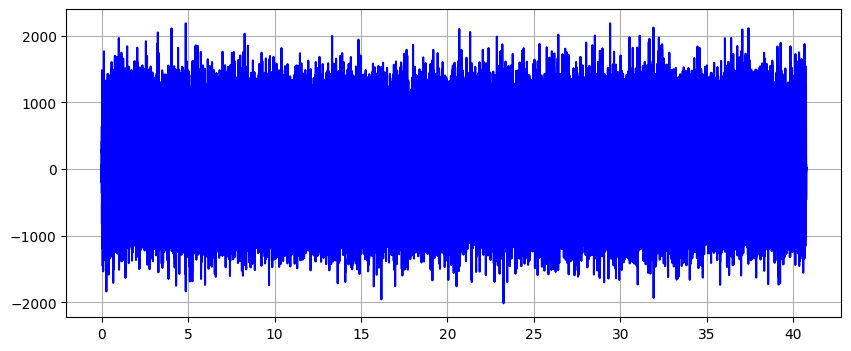

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(t_21 , data_zoom_21_2, color='blue')
plt.grid(True)
plt.show()

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


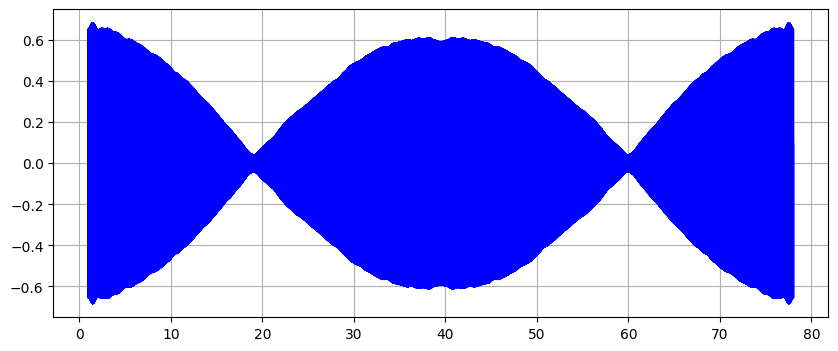

In [5]:
t_index = (t_21 > 1) & (t_21 < 78)
t_rotation = t_21[t_index]
data_zoom_2_rotation = data_zoom_21_2[t_index]/max(data_zoom_21_2[t_index])

data_zoom_2_rotation_f = fft(data_zoom_2_rotation)
f_rotation = fftfreq(int(len(data_zoom_2_rotation)), 1 / sample_rate)
data_zoom_2_rotation_filt = ifft(filt_freq(data_zoom_2_rotation_f, 532, 534))

plt.figure(figsize=(10,4))
plt.plot(t_rotation, ((data_zoom_2_rotation_filt)), color='blue')
# plt.xlim(520, 540)
plt.grid(True)

/Users/bogda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


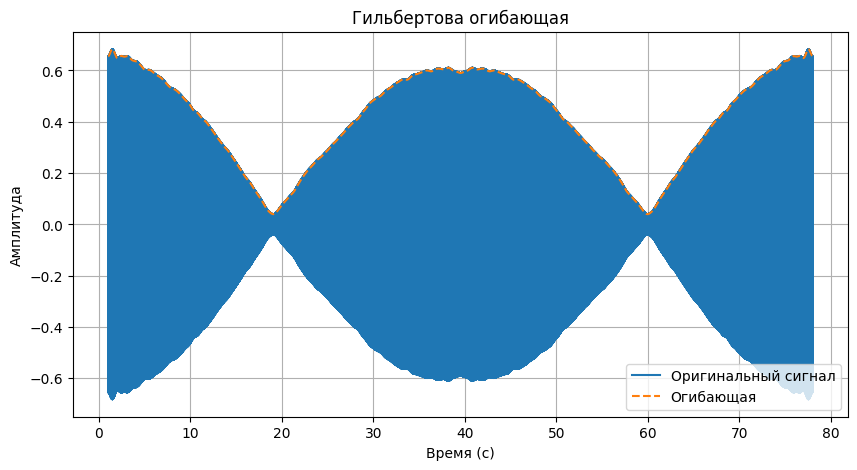

In [ ]:
from scipy.signal import hilbert

# Применяем преобразование Гильберта
analytic_signal = hilbert(np.real(data_zoom_2_rotation_filt))
envelope = np.abs(analytic_signal)  # Огибающая

plt.figure(figsize=(10, 5))
plt.plot(t_rotation, data_zoom_2_rotation_filt, label="Оригинальный сигнал")
plt.plot(t_rotation, envelope, label="Огибающая", linestyle="dashed")
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Гильбертовa огибающая")
plt.grid()
plt.show()


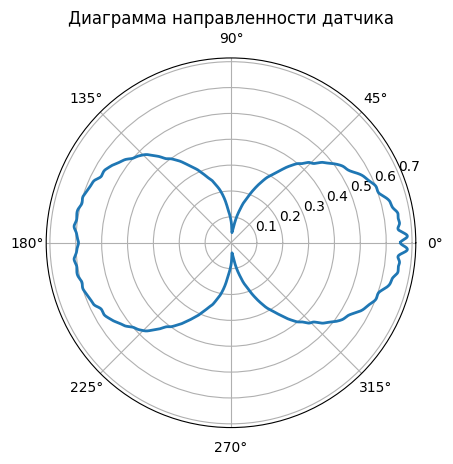

In [ ]:
def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    #ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

# Пример данных: синтетический сигнал, моделирующий направленность
# num_points = 360
# example_signal = np.abs(np.cos(np.linspace(0, 2 * np.pi, num_points)))

plot_radiation_pattern(envelope)


/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_5056/3487247369.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data_zoom_19_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0019/ZOOM0019_Tr2.WAV')


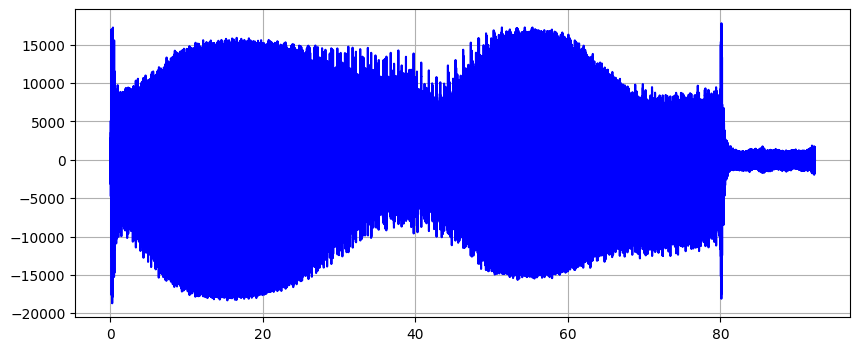

In [2]:
sample_rate, data_zoom_19_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0019/ZOOM0019_Tr2.WAV')
t_19 = np.arange(len(data_zoom_19_2))/sample_rate
f_19 = fftfreq(int(len(data_zoom_19_2)), 1 / sample_rate)
plt.figure(figsize=(10,4))
plt.plot(t_19 , data_zoom_19_2, color='blue')
plt.grid(True)
plt.show()

In [ ]:
t_index = (t_19 > 2) & (t_19 < 79)
t_rotation = t_19[t_index]
data_zoom_2_rotation = data_zoom_19_2[t_index]/max(data_zoom_19_2[t_index])

data_zoom_2_rotation_f = fft(data_zoom_2_rotation)
f_rotation = fftfreq(int(len(data_zoom_2_rotation)), 1 / sample_rate)
data_zoom_2_rotation_filt = ifft(filt_freq(data_zoom_2_rotation_f, 532, 534))

plt.figure(figsize=(10,4))
plt.plot(t_rotation, ((data_zoom_2_rotation_filt)), color='blue')

plt.grid(True)

In [ ]:
def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

# Пример данных: синтетический сигнал, моделирующий направленность
# num_points = 360
# example_signal = np.abs(np.cos(np.linspace(0, 2 * np.pi, num_points)))

plot_radiation_pattern(data_zoom_2_rotation_filt)


/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


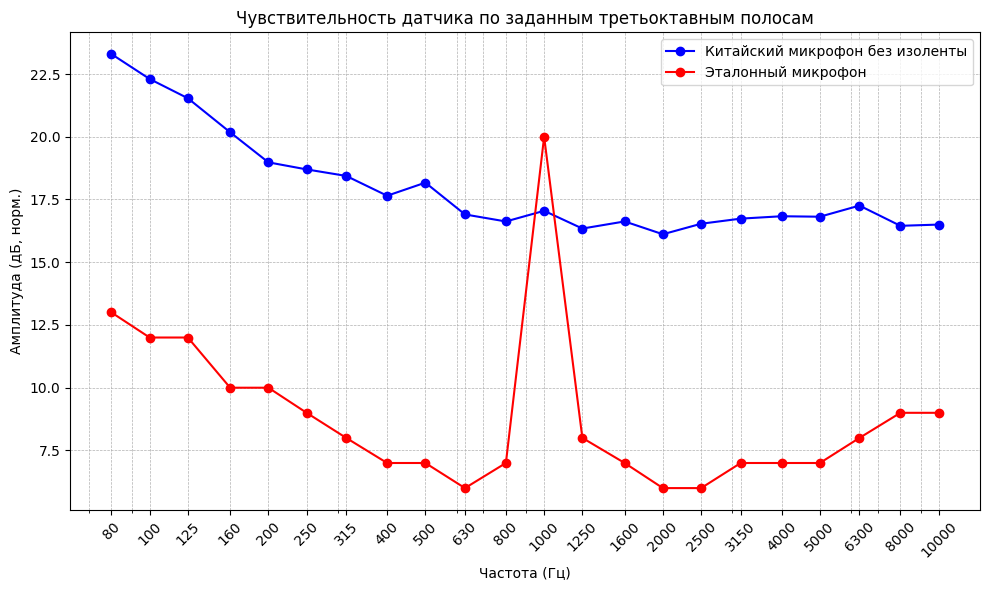

In [ ]:
octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона

amp_standard_23 = np.array([55, 53, 53, 54, 55, 55, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])
amp_standard_self = np.array([13, 12, 12, 10, 10, 9, 8, 7, 7, 6, 7, 20, 8, 7, 6, 6, 7, 7, 7, 8, 9, 9])

fs, data_23 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0023S1.wav')
fs, data_30 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0030S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_23, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_23_pa = 10**(amp_standard_23 / 20) 

k = amp_standard_23_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_30, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db = 20 * np.log10(amplitudes_norm_calibrated) 

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db, marker='o', color='blue', label='Китайский микрофон без изоленты')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

Необходимо использовать данные с эталона:
Берем данные с эталона и мы знаем, что это точно децибеллы, переводим это в паскали и мы точно знаем поле. Используя это переводим наши условнные единицы с китайских микрофонов в децибеллы.


In [12]:
amp_standard_24 = np.array([55, 53, 54, 54, 57, 57, 57, 58, 59, 58, 59 , 60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])
amp_standard_self = np.array([13, 12, 12, 10, 10, 9, 8, 7, 7, 6, 7, 20, 8, 7, 6, 6, 7, 7, 7, 8, 9, 9])

fs, data_24 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0024S1.wav')
fs, data_29 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0029S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_24, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_24_pa = 10**(amp_standard_24 / 20) 

k = amp_standard_24_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_29, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db = 20 * np.log10(amplitudes_norm_calibrated) 

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


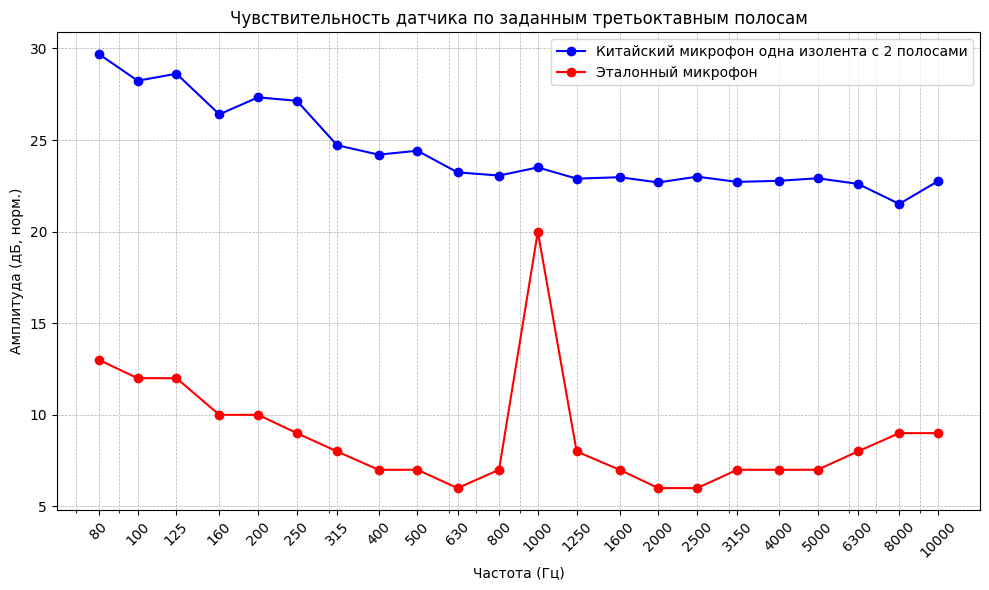

In [13]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db, marker='o', color='blue', label='Китайский микрофон одна изолента с 2 полосами')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [14]:
amp_standard_25 = np.array([55, 54, 54, 55, 55, 57, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])
amp_standard_self = np.array([13, 12, 12, 10, 10, 9, 8, 7, 7, 6, 7, 20, 8, 7, 6, 6, 7, 7, 7, 8, 9, 9])

fs, data_25 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0025S1.wav')
fs, data_28 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0028S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_25, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_25_pa = 10**(amp_standard_25 / 20) 

k = amp_standard_25_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_28, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db = 20 * np.log10(amplitudes_norm_calibrated) 

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


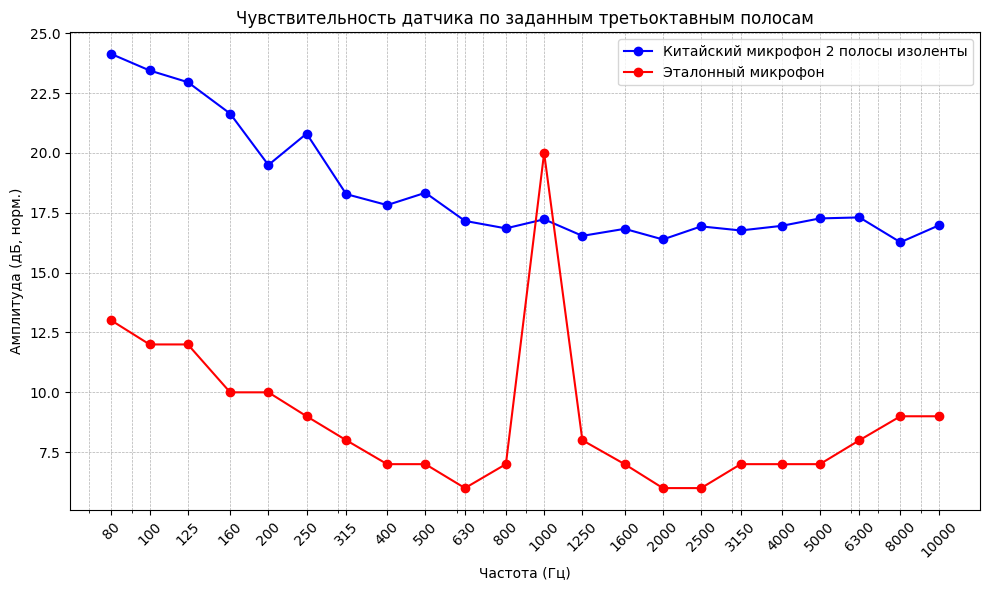

In [15]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db, marker='o', color='blue', label='Китайский микрофон 2 полосы изоленты')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [16]:
amp_standard_26 = np.array([55, 54, 54, 55, 55, 57, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])
amp_standard_self = np.array([13, 12, 12, 10, 10, 9, 8, 7, 7, 6, 7, 20, 8, 7, 6, 6, 7, 7, 7, 8, 9, 9])

fs, data_26 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0026S1.wav')
fs, data_27 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0027S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_26, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_26_pa = 10**(amp_standard_26 / 20) 

k = amp_standard_26_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_27, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db = 20 * np.log10(amplitudes_norm_calibrated) 

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


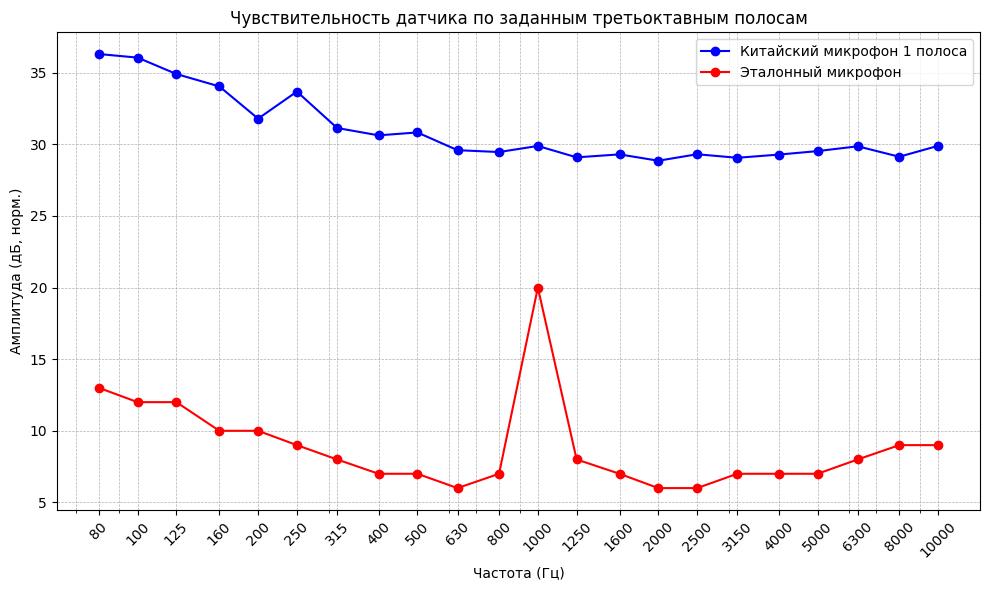

In [17]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db, marker='o', color='blue', label='Китайский микрофон 1 полоса')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()